In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df = DataFrame({
    'key1':['a', 'a', 'b', 'b', 'a'],
    'key2':['one', 'two', 'one', 'two', 'one'],
    'data1':np.random.randn(5),
    'data2':np.random.randn(5)
})
df

,data1,data2,key1,key2
0,0.402750,0.951461,a,one
1,1.032817,0.458521,a,two
2,-0.631084,0.387321,b,one
3,-1.025252,-0.399678,b,two
4,-0.811711,0.138046,a,one


In [3]:
# 按key1分组，并计算data1的平均值
df['data1'].groupby(df['key1']).mean()

key1
a    0.207952
b   -0.828168
Name: data1, dtype: float64

In [4]:
# 传多个数组
mean = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [5]:
# 拆分
mean.unstack()

key2,one,two
key1,,
a,-0.204480,1.032817
b,-0.631084,-1.025252


In [6]:
# 在上面的例子中，分组键均为Series，其实分组键也可以是任何长度适当的数组
states = np.array(['Ohio', 'California', 'California', 'Phio', 'Ohio'])

In [7]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [8]:
df['data1'].groupby([states, years]).mean()

California  2005    1.032817
            2006   -0.631084
Ohio        2005    0.402750
            2006   -0.811711
Phio        2005   -1.025252
Name: data1, dtype: float64

In [9]:
# 也可以将列名（可以是字符串、数组或其他Python对象）用作分组键：
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.207952,0.516010
b,-0.828168,-0.006178


In [10]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one  -0.204480  0.544754
     two   1.032817  0.458521
b    one  -0.631084  0.387321
     two  -1.025252 -0.399678

In [11]:
# 对分组进行迭代
for name, group in df.groupby('key1'):
    print (name)
    print (group)

a
      data1     data2 key1 key2
0  0.402750  0.951461    a  one
1  1.032817  0.458521    a  two
4 -0.811711  0.138046    a  one
b
      data1     data2 key1 key2
2 -0.631084  0.387321    b  one
3 -1.025252 -0.399678    b  two


In [12]:
# 对于多重键的情况，元组的第一个元素将会是由键值组成的元组：
for (k1, k2), group in df.groupby(['key1','key2']):
    print(k1,k2)
    print(group)


a one
      data1     data2 key1 key2
0  0.402750  0.951461    a  one
4 -0.811711  0.138046    a  one
a two
      data1     data2 key1 key2
1  1.032817  0.458521    a  two
b one
      data1     data2 key1 key2
2 -0.631084  0.387321    b  one
b two
      data1     data2 key1 key2
3 -1.025252 -0.399678    b  two


联邦选举委员会

In [15]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./data/campaign/P00000001-ALL.csv')

c:\python35-32\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
data[:10]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 68.8+ MB


In [20]:
unique_cands = data['cand_nm'].unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [22]:
# 为数据表添加候选人党派信息
# 党派信息以字典的方式给出
parties = {
    'Bachmann, Michelle' : 'Republican',
    'Cain, Herman' : 'Republican',
     'Gingrich, Newt' : 'Republican',
     'Huntsman, Jon' : 'Republican',
     'Johnson, Gary Earl' :  'Republican',
    'McCotter, Thaddeus G' : 'Republican',
    'Obama, Barack': 'Democrat',
    'Paul, Ron' : 'Republican',
    'Pawlenty, Timothy':'Republican',
     'Perry, Rick':'Republican',
    "Roemer, Charles E. 'Buddy' III" : 'Republican',
     'Romney, Mitt':'Republican',
    'Santorum, Rick': 'Republican'
}

In [28]:
# 为数据添加一个新列
data['parties'] = data.cand_nm.map(parties)
data['parties'].value_counts()

Democrat      593746
Republican    407985
Name: parties, dtype: int64

In [39]:
# 缺失值处理 contbr_employer，contbr_occupation，memo_text，memo_cd，receipt_desc
data['contbr_employer'].fillna('NOT PROVIDED',inplace=True)
# data.contbr_employer.isnull().value_counts()
data['contbr_occupation'].fillna('NOT PROVIDED',inplace=True)
# data['contbr_occupation'].isnull().value_counts()
data['memo_text'].fillna('default',inplace=True)
data['memo_cd'].fillna('default',inplace=True)
data['receipt_desc'].fillna('default',inplace=True)

In [42]:
# 不同候选人的资助人数分布
cand_voters = data['cand_nm'].value_counts()

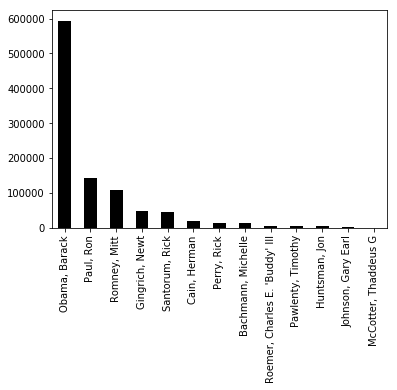

In [54]:
from matplotlib import *
cand_voters.plot(kind='bar', colormap='')
